1. **Carga de Datos y Exploración:**
   - Carga los datos en un DataFrame.
   - Explora los datos para comprender la estructura del conjunto de datos.
   - Elimina los datos nulos o incorrectos.

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import numpy as np

In [19]:
df= pd.read_csv('cardio.csv');
df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,M,50,1.0,Yes,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,M,51,3.0,Yes,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,F,48,2.0,Yes,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,F,44,1.0,Yes,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [20]:
df= df.dropna()
df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,M,58,3.0,No,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,M,68,1.0,No,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,M,50,1.0,Yes,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,M,51,3.0,Yes,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [21]:
df =df.drop_duplicates()
df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,M,58,3.0,No,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,M,68,1.0,No,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,M,50,1.0,Yes,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,M,51,3.0,Yes,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [22]:
df['sex'] = df['sex'].replace({'M': 1, 'F': 0})
df['sex']

0       1
1       0
2       1
3       0
4       0
       ..
4231    1
4232    1
4233    1
4234    1
4237    0
Name: sex, Length: 3656, dtype: int64

In [23]:
df['currentSmoker'] = df['currentSmoker'].replace({'No': 0, 'Yes': 1})
df['currentSmoker']

0       0
1       0
2       1
3       1
4       1
       ..
4231    0
4232    0
4233    1
4234    1
4237    0
Name: currentSmoker, Length: 3656, dtype: int64

In [24]:
df = df.fillna(df.mean())
df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


```
2.-Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas,
utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?
```

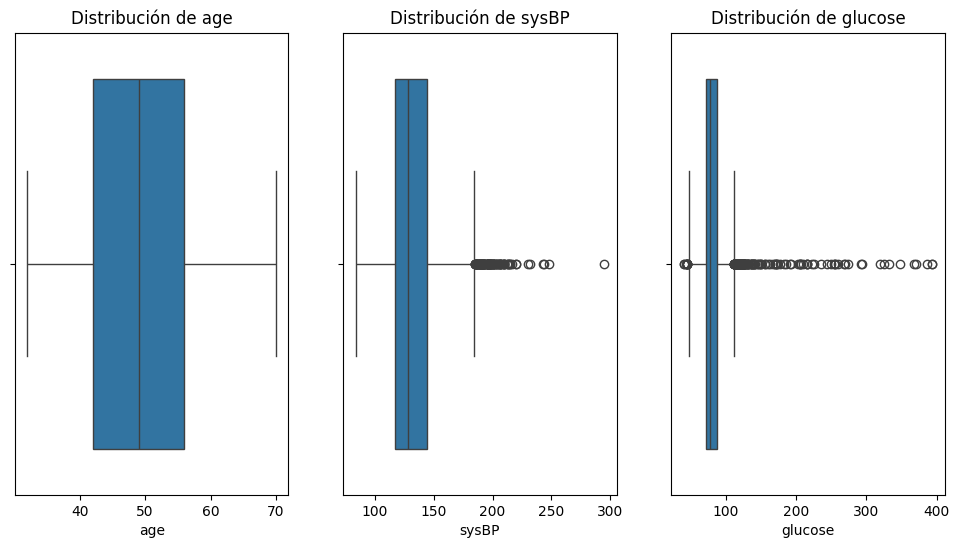

Análisis Descriptivo:
               age        sysBP      glucose
count  3656.000000  3656.000000  3656.000000
mean     49.557440   132.368025    81.856127
std       8.561133    22.092444    23.910128
min      32.000000    83.500000    40.000000
25%      42.000000   117.000000    71.000000
50%      49.000000   128.000000    78.000000
75%      56.000000   144.000000    87.000000
max      70.000000   295.000000   394.000000

Dispersión de Variables:
age         8.561133
sysBP      22.092444
glucose    23.910128
dtype: float64


In [25]:
# Escoger tres variables cuantitativas
variables_cuantitativas = ['age', 'sysBP', 'glucose']

# Realizar análisis descriptivo
descripcion = df[variables_cuantitativas].describe()

# Calcular la dispersión (desviación estándar) de cada variable
dispersión = df[variables_cuantitativas].std()

# Crear gráficos de caja para cada variable
plt.figure(figsize=(12, 6))
for i, variable in enumerate(variables_cuantitativas, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[variable])
    plt.title(f'Distribución de {variable}')

plt.show()

print("Análisis Descriptivo:")
print(descripcion)
print("\nDispersión de Variables:")
print(dispersión)

Observando los resultados, la variable 'glucose' tiene la mayor dispersión, ya que su desviación estándar es la más grande entre las tres variables seleccionadas. Esto indica que 'glucose' tiene una mayor variabilidad en sus valores en comparación con 'age' y 'sysBP'.

```

```
3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el
dataset "limpio"
```

In [26]:
def eliminar_atipicos(df, column_name):
    # Calcular el rango intercuartil (IQR) para la columna
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    # Definir los límites para identificar los outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # Filtrar los datos para eliminar outliers en la columna y actualizar el DataFrame
    df[column_name] = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)][column_name]
# Ejemplo de uso para eliminar outliers en la columna 'edad'
columnas_para_filtrar = ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

# Aplicar la función eliminar_atipicos a todas las columnas
for columna in columnas_para_filtrar:
    eliminar_atipicos(df, columna)
df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0.0,0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0,46,2.0,0,0.0,0.0,0.0,0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1,48,1.0,1,20.0,0.0,0.0,0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0,61,3.0,1,30.0,0.0,0.0,1,0.0,225.0,150.0,95.0,28.58,65.0,103.0,NaN
4,0,46,3.0,1,23.0,0.0,0.0,0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0.0,1,0.0,187.0,141.0,81.0,24.96,80.0,81.0,0.0
4232,1,68,1.0,0,0.0,0.0,0.0,1,0.0,176.0,168.0,97.0,23.14,60.0,79.0,NaN
4233,1,50,1.0,1,1.0,0.0,0.0,1,0.0,313.0,179.0,92.0,25.97,66.0,86.0,NaN
4234,1,51,3.0,1,43.0,0.0,0.0,0,0.0,207.0,126.5,80.0,19.71,65.0,68.0,0.0


```4. ¿Qué variables cuantitativas presentan mayor correlación? Explica.```

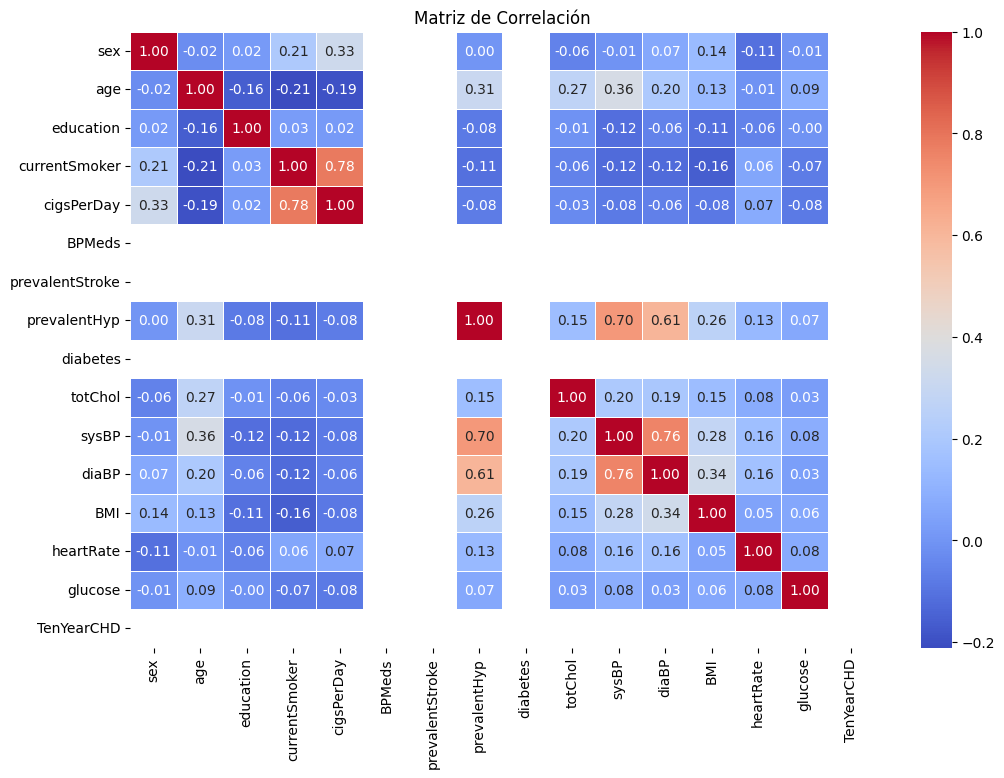

In [34]:
variables_cuantitativas = df[columnas_para_filtrar]
# Calcular la matriz de correlación
matriz_correlacion = variables_cuantitativas.corr()
# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


1. **`cigsPerDay` vs `currentSmoker`: 0.78:**
   - Un coeficiente de 0.78 indica una correlación positiva fuerte entre la cantidad de cigarrillos por día y el hecho de ser fumador actual. Esto tiene sentido, ya que es probable que las personas que fuman más cigarrillos al día también sean más propensas a ser fumadores actuales.

2. **`sysBP` vs `diaBP`: 0.76:**
   - Un coeficiente de 0.76 indica una correlación positiva fuerte entre la presión sistólica (`sysBP`) y la presión diastólica (`diaBP`). Esto es coherente con la comprensión general de la presión arterial, donde ambas medidas tienden a aumentar o disminuir juntas.

3. **`diaBP` vs `prevalentHyp`: 0.61:**
   - Un coeficiente de 0.61 indica una correlación positiva moderada entre la presión diastólica y la hipertensión prevalente. Esto sugiere que las personas con presión diastólica más alta tienden a tener una mayor prevalencia de hipertensión.

4. **`currentSmoker` vs `age`: -0.21:**
   - Un coeficiente de -0.21 indica una correlación negativa débil entre ser fumador actual y la edad. Esto podría significar que, en general, a medida que las personas envejecen, tienden a fumar menos.

5. **`cigsPerDay` vs `age`: -0.19:**
   - Un coeficiente de -0.19 indica una correlación negativa débil entre la cantidad de cigarrillos por día y la edad. Esto podría sugerir que, en general, a medida que las personas envejecen, tienden a fumar menos cigarrillos por día.

6. **`education` vs `age`: -0.16:**
   - Un coeficiente de -0.16 indica una correlación negativa débil entre el nivel de educación y la edad. Esto podría interpretarse como que, en general, las personas tienden a obtener niveles más altos de educación a edades más tempranas.

```
5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea
hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al
índice de masa corporal?
```

In [36]:
# Identificar el mayor cuartil de BMI
mayor_cuartil_bmi = df['BMI'].quantile(0.75)

# Filtrar los datos para aquellos que pertenecen al mayor cuartil de BMI
pacientes_mayor_cuartil_bmi = df[df['BMI'] >= mayor_cuartil_bmi]

# Calcular la probabilidad condicional de ser hombre dentro de ese cuartil
probabilidad_hombre_en_mayor_cuartil = pacientes_mayor_cuartil_bmi[pacientes_mayor_cuartil_bmi['sex'] == 1].shape[0] / pacientes_mayor_cuartil_bmi.shape[0]

print(f"La probabilidad de ser hombre dado que pertenece al mayor cuartil de BMI es: {probabilidad_hombre_en_mayor_cuartil:.2%}")

La probabilidad de ser hombre dado que pertenece al mayor cuartil de BMI es: 52.18%


**Análisis:**

La probabilidad de ser hombre dado que pertenece al mayor cuartil de BMI es del 52.18%. Este resultado sugiere que, en el subconjunto de pacientes con un índice de masa corporal en el mayor cuartil, más de la mitad son hombres según los datos disponibles en el conjunto de datos. Este hallazgo puede ser útil para comprender la distribución de género en relación con la variable BMI y puede tener implicaciones en investigaciones o decisiones relacionadas con la salud.


```
6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro
del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.
```

In [39]:
# Supongamos que tienes una muestra de ritmos cardíacos
ritmo_cardiaco_muestra = df['heartRate'].dropna()  # Eliminamos los valores nulos si los hay

# Realizar la prueba de hipótesis
hipotesis_nula_valor = 75
estadistico_prueba, valor_p = ttest_1samp(ritmo_cardiaco_muestra, hipotesis_nula_valor)

# Nivel de significancia
nivel_significancia = 0.05

# Comparar el valor p con el nivel de significancia
if valor_p < nivel_significancia:
    print(f"Rechazamos la hipótesis nula. Hay evidencia para afirmar que el ritmo cardíaco promedio no es igual a {hipotesis_nula_valor}.")
else:
    print(f"No hay suficiente evidencia para rechazar la hipótesis nula. El ritmo cardíaco promedio es estadísticamente igual a {hipotesis_nula_valor}.")

No hay suficiente evidencia para rechazar la hipótesis nula. El ritmo cardíaco promedio es estadísticamente igual a 75.


**Análisis de la Prueba de Hipótesis sobre el Ritmo Cardíaco Promedio**

Según la prueba de hipótesis realizada con la muestra de ritmos cardíacos proporcionada:

- **Hipótesis Nula (H0):** El ritmo cardíaco promedio es igual a 75.
- **Hipótesis Alternativa (H1):** El ritmo cardíaco promedio no es igual a 75.

El resultado de la prueba muestra que no hay suficiente evidencia para rechazar la hipótesis nula. En términos estadísticos, el ritmo cardíaco promedio es considerado igual a 75 según la muestra utilizada en la prueba de hipótesis.

**Interpretación:**
- Dado que no rechazamos la hipótesis nula, es razonable afirmar que, para una persona cualquiera (según la muestra analizada), el ritmo cardíaco promedio es estadísticamente igual a 75.
- Sin embargo, esta conclusión está limitada a la muestra proporcionada y podría cambiar con datos adicionales o análisis más detallados en el futuro.



```
7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los
pacientes fumadores? Explica
```

In [59]:
# 1. Filtrar los datos para pacientes fumadores
fumadores = df[df['currentSmoker'] == 1]

# 2. Dividir por género
hombres_fumadores = fumadores[fumadores['sex'] == 1]
mujeres_fumadoras = fumadores[fumadores['sex'] == 0]

# 3. Calcular el promedio de cigarrillos consumidos por día
promedio_cigarrillos_hombres = hombres_fumadores['cigsPerDay'].mean()
promedio_cigarrillos_mujeres = mujeres_fumadoras['cigsPerDay'].mean()

# 4. Realizar un análisis comparativo
diferencia_promedios = promedio_cigarrillos_hombres - promedio_cigarrillos_mujeres

# 5. Realizar la prueba t de dos muestras
estadistico_prueba, valor_p = ttest_ind(hombres_fumadores['cigsPerDay'], mujeres_fumadoras['cigsPerDay'])

# Imprimir resultados
print(f"Promedio de cigarrillos consumidos por día (Hombres): {promedio_cigarrillos_hombres:.2f}")
print(f"Promedio de cigarrillos consumidos por día (Mujeres): {promedio_cigarrillos_mujeres:.2f}")
print(f"Diferencia en promedio: {diferencia_promedios:.2f}")
print(f"Valor p de la prueba t: {valor_p:.4f}")

# Interpretar los resultados
if valor_p < 0.05:
    print("Hay evidencia significativa de que el promedio de cigarrillos consumidos por día difiere entre hombres y mujeres fumadores.")
else:
    print("No hay suficiente evidencia para afirmar que el promedio de cigarrillos consumidos por día difiere entre hombres y mujeres fumadores.")


Valor p de la prueba t: 0.0000
Hay evidencia significativa de que el promedio de cigarrillos consumidos por día difiere entre hombres y mujeres fumadores.
